In [ ]:
# Import libraries and modules.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices




In [ ]:
data = pd.read_csv('marketing_sales_data.csv')

data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


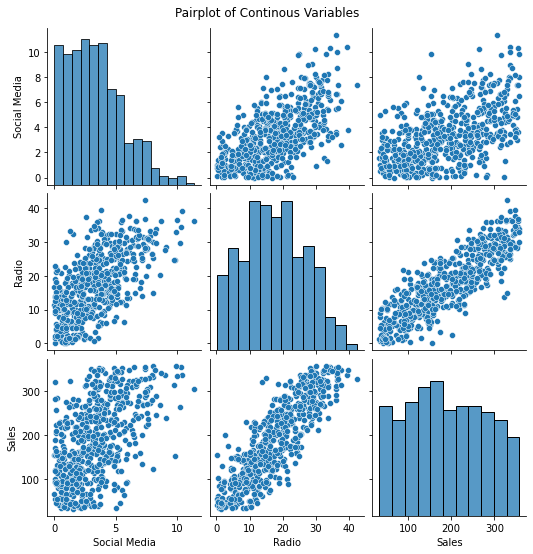

In [6]:
# Create a pairplot of the data.

sns.pairplot(data=data, vars=["Social Media", "Radio", "Sales"])
plt.suptitle("Pairplot of Continous Variables", y=1.02)
plt.show()



In [7]:
# Calculate the mean sales for each TV category. 

mean_sales_tv = data.groupby("TV")["Sales"].mean()
print("Mean Sales by TV Category:")
print(mean_sales_tv)
print("\n")



# Calculate the mean sales for each Influencer category. 

mean_sales_influencer = data.groupby("Influencer")["Sales"].mean()
print("Mean Sales by Influencer Category: ")
print(mean_sales_influencer)
print("\n")



Mean Sales by TV Category:
TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64


Mean Sales by Influencer Category: 
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64




In [ ]:
# Droped rows that contain missing data and update the DataFrame.

data.dropna(inplace=True)
clean_data = data.reset_index(drop=True)

clean_data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [ ]:
# Renamed all columns in data that contain a space. 

clean_data.columns = clean_data.columns.str.replace(" ", "_")

print(clean_data.columns)



Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')


In [ ]:
# Defining the OLS formula.

formula = 'Sales ~ Radio + C(TV)'


# Create an OLS model.

model = smf.ols(formula=formula, data=clean_data) 


# Fit the model.

results = model.fit()


# Save the results summary.

summary = results.summary()


# Display the model results.

summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          1.63e-288
Time:                        10:09:46   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

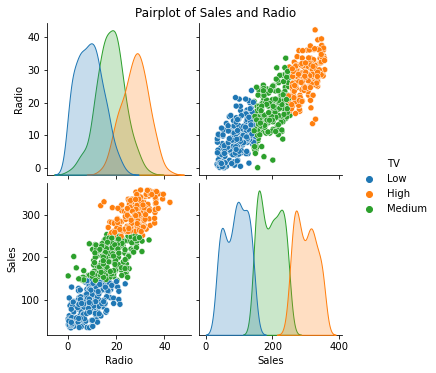

In [ ]:
# A scatterplot for each independent variable and the dependent variable.

sns.pairplot(clean_data, vars=['Radio', 'Sales'], hue='TV', kind='scatter')
plt.suptitle('Pairplot of Sales and Radio', y=1.02)
plt.show()




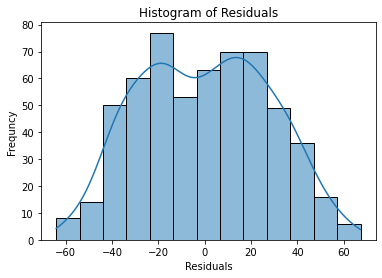

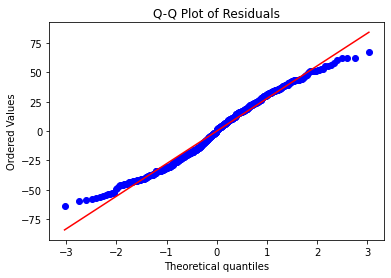

In [ ]:
# Calculate the residuals.

residuals = results.resid


# A histogram with the residuals. 

sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequncy')
plt.show()

# A Q-Q plot of the residuals.

stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


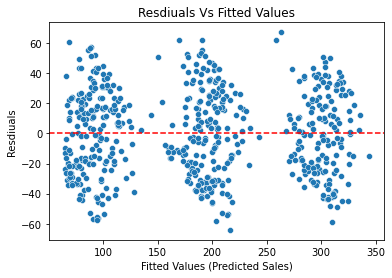

In [ ]:
# A scatterplot with the fitted values from the model and the residuals.

fitted_values = results.fittedvalues

sns.scatterplot(x=fitted_values,y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resdiuals Vs Fitted Values')
plt.xlabel('Fitted Values (Predicted Sales)')
plt.ylabel('Resdiuals')
plt.show()



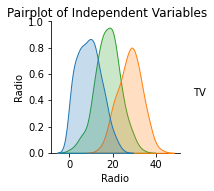

In [ ]:
# A pairplot of the data.

sns.pairplot(clean_data, vars=['Radio'], hue='TV')
plt.suptitle('Pairplot of Independent Variables', y=1.02)
plt.show()



In [ ]:
# Calculate the variance inflation factor (VIF).

y, X = dmatrices(formula, data=clean_data, return_type='dataframe')

vif_data = pd.DataFrame()
vif_data["Feature"]= X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


           Feature        VIF
0        Intercept  28.769927
1     C(TV)[T.Low]   4.063859
2  C(TV)[T.Medium]   2.216678
3            Radio   2.834074


In [ ]:
# Displaying model results summary.

summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          1.63e-288
Time:                        10:09:46   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""